# Описание датасета
**Electric Power Consumption (Потребление электроэнергии в г. Тетуан, Марокко)**

**Предметная область:** Энергетика, умные сети, прогнозирование спроса.

**Источник данных:** [https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption?resource=download](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption?resource=download)

**Характер данных:** Реальные данные.

**Описание задачи анализа:** Настоящее исследование направлено на комплексный анализ паттернов энергопотребления города Тетуан (Марокко) и выявление ключевых факторов, влияющих на нагрузку в распределительной сети. Исследование включает построение прогнозных моделей для предсказания суточного и сезонного потребления электроэнергии, а также проведение корреляционного анализа между метеорологическими условиями и объемом энергопотребления в трех различных зонах города.

# Описание атрибутов

**Datetime** (datetime тип): временная метка с 10-минутным интервалом, обеспечивающая хронологический порядок записей и позволяющая анализировать временные паттерны потребления

**Temperature** (числовой тип, float): показатель температуры окружающей среды в градусах Цельсия, являющийся ключевым фактором для систем кондиционирования и отопления

**Humidity** (числовой тип, float): уровень относительной влажности воздуха в процентах, влияющий на воспринимаемую температуру и работу климатического оборудования

**WindSpeed** (числовой тип, float): скорость движения воздушных масс в м/с, оказывающая воздействие на эффективность естественной вентиляции и работу ветрогенераторов

**GeneralDiffuseFlows** (числовой тип, float): общие диффузные потоки в распределительной сети, характеризующие рассеянное потребление энергии по всей сети

**DiffuseFlows** (числовой тип, float): специфические диффузные потоки, отражающие дополнительные параметры распределения энергии в сети низкого напряжения

**PowerConsumption_Zone1** (числовой тип, float): объем потребления электроэнергии в зоне 1 (Quads) в киловатт-часах, представляющий нагрузку от жилого и коммерческого сектора

**PowerConsumption_Zone2** (числовой тип, float): объем потребления электроэнергии в зоне 2 (Smir) в киловатт-часах, включающий промышленные и бытовые нагрузки

**PowerConsumption_Zone3** (числовой тип, float): объем потребления электроэнергии в зоне 3 (Boussafou) в киловатт-часах, охватывающий смешанный тип потребителей

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("powerconsumption.csv")

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [13]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


# Среднее и СКО

In [14]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

stats_df = df[numeric_columns].agg(['mean', 'std']).transpose()
stats_df.columns = ['Среднее', 'Стандартное отклонение']
print(stats_df)

                             Среднее  Стандартное отклонение
Temperature                18.810024                5.815476
Humidity                   68.259518               15.551177
WindSpeed                   1.959489                2.348862
GeneralDiffuseFlows       182.696614              264.400960
DiffuseFlows               75.028022              124.210949
PowerConsumption_Zone1  32344.970564             7130.562564
PowerConsumption_Zone2  21042.509082             5201.465892
PowerConsumption_Zone3  17835.406218             6622.165099


# Распределение и выбросы в числовых признаках

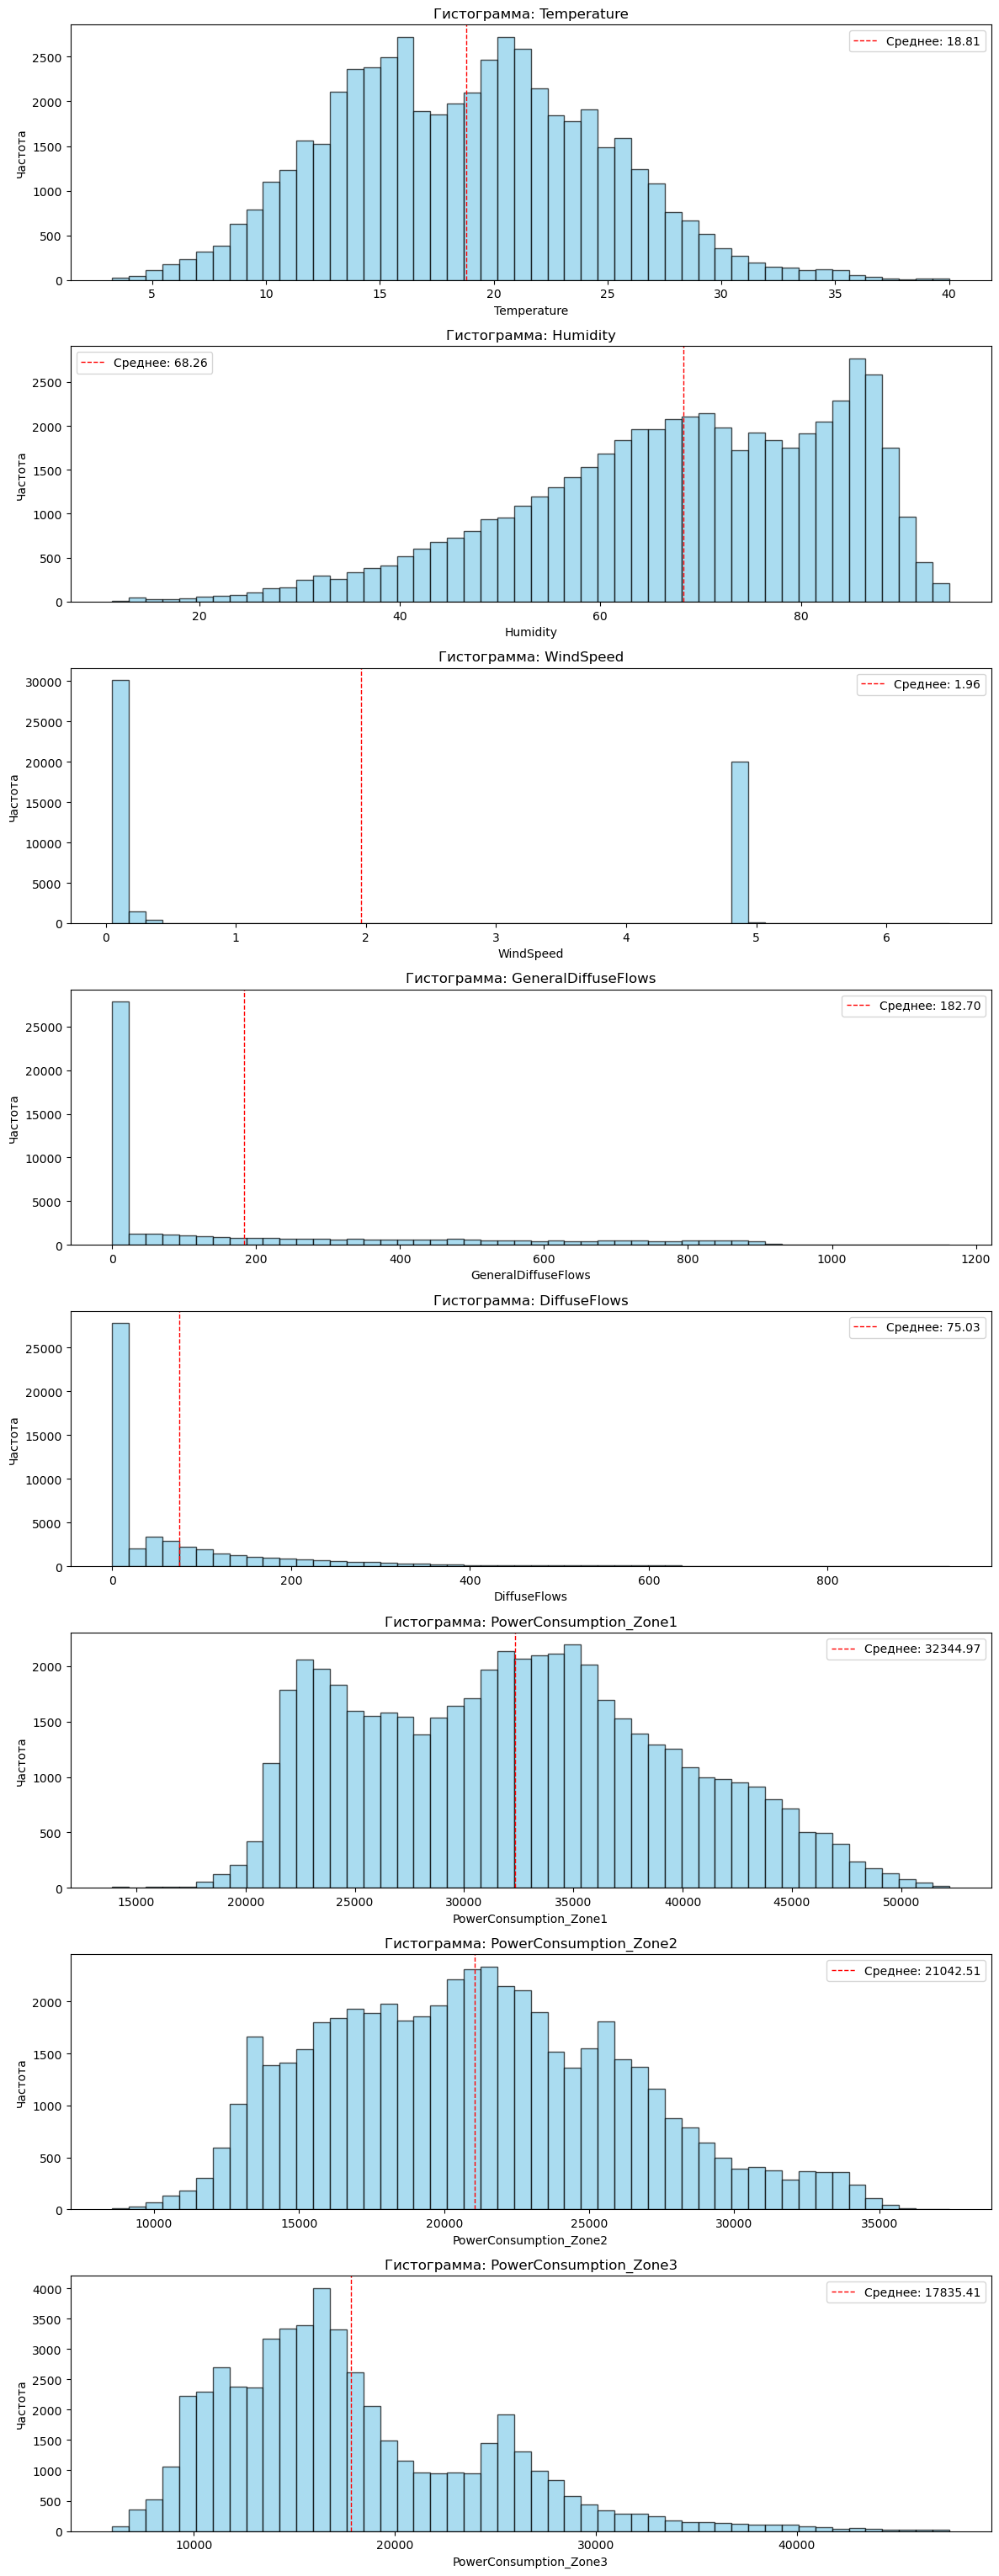

In [26]:
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 4*len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].set_title(f'Гистограмма: {col}', fontsize=12)
    axes[i].set_ylabel('Частота')
    axes[i].set_xlabel(col)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=1, label=f'Среднее: {df[col].mean():.2f}')
    axes[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Анализ выбросов

In [33]:
numerical_data = df.select_dtypes(include=[np.number])
outlier_analysis = []

for column_name in numerical_data.columns:
    Q1 = numerical_data[column_name].quantile(0.25)
    Q3 = numerical_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = numerical_data[(numerical_data[column_name] < lower_bound) | (numerical_data[column_name] > upper_bound)]
    total_outliers = len(outliers)
    
    outlier_analysis.append({
        'Атрибут': column_name,
        'Всего значений': len(numerical_data),
        'Выбросы': total_outliers,
        'Доля выбросов (%)': f"{(total_outliers / len(numerical_data) * 100):.2f}",
        'Нижняя граница': f"{lower_bound:.2f}",
        'Верхняя граница': f"{upper_bound:.2f}",
        'IQR': f"{IQR:.2f}"
    })
outliers_report = pd.DataFrame(outlier_analysis)
outliers_report    

,Атрибут,Всего значений,Выбросы,Доля выбросов (%),Нижняя граница,Верхняя граница,IQR
0,Temperature,52416,142,0.27,1.69,35.61,8.48
1,Humidity,52416,291,0.56,23.67,116.04,23.09
2,WindSpeed,52416,0,0.00,-7.18,12.17,4.84
3,GeneralDiffuseFlows,52416,2315,4.42,-479.25,798.91,319.54
4,DiffuseFlows,52416,4571,8.72,-151.19,252.32,100.88
5,PowerConsumption_Zone1,52416,0,0.00,9813.14,53806.54,10998.35
6,PowerConsumption_Zone2,52416,7,0.01,5381.34,36313.14,7732.95
7,PowerConsumption_Zone3,52416,1191,2.27,387.17,34366.26,8494.77


**Высокий уровень выбросов (>5%):**
DiffuseFlows - 8.72% (4,571 выбросов) - наибольшее количество аномалий,
GeneralDiffuseFlows - 4.42% (2,315 выбросов) - значительное количество выбросов

**Умеренный уровень выбросов (1-5%):**
PowerConsumption_Zone3 - 2.27% (1,191 выбросов),
Humidity - 0.56% (291 выброс)

**Низкий уровень выбросов (<1%):**
Temperature - 0.27% (142 выброса),
PowerConsumption_Zone2 - 0.01% (7 выбросов),
WindSpeed, PowerConsumption_Zone1 - 0.00% (отсутствуют выбросы)

# Проверка пропущенных значений

In [16]:
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


# Корреляция между параметрами

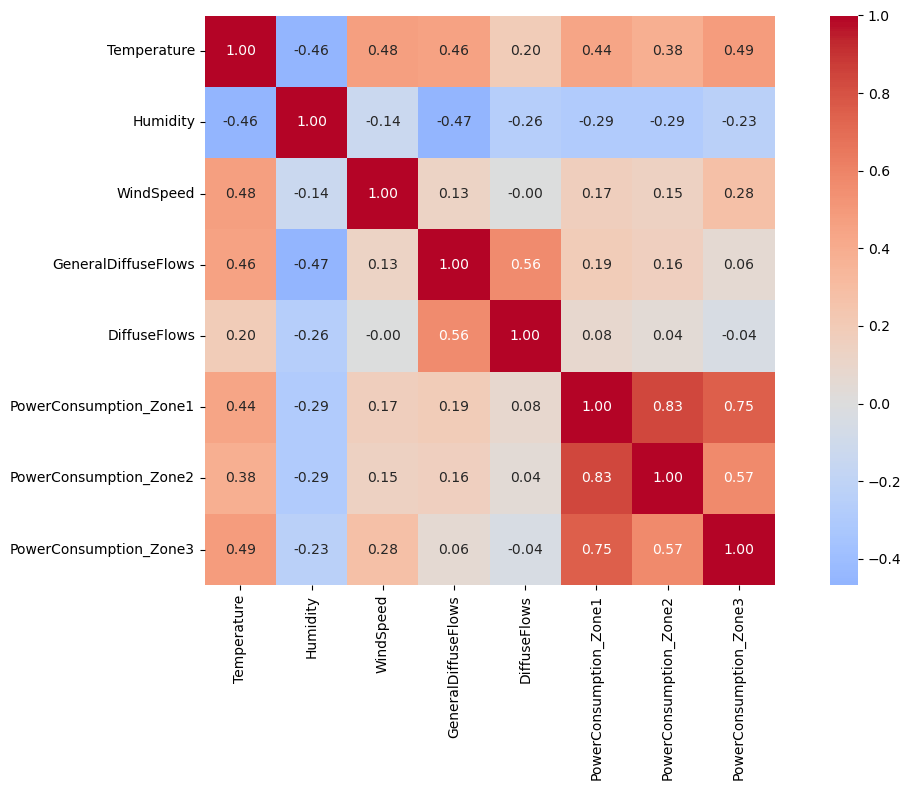

In [34]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True)
plt.tight_layout()
plt.show()

In [38]:
tech_corr = correlation_matrix.loc['GeneralDiffuseFlows', 'DiffuseFlows']
print(f"1. Технические параметры:")
print(f"   GeneralDiffuseFlows ↔ DiffuseFlows: {tech_corr:.3f}")

print(f"\n2. Корреляция потребления между зонами:")
zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
for i in range(len(zones)):
    for j in range(i+1, len(zones)):
        corr_val = correlation_matrix.loc[zones[i], zones[j]]
        print(f"   {zones[i]} ↔ {zones[j]}: {corr_val:.3f}")

print(f"\n3. Погода vs Потребление:")
weather = ['Temperature', 'Humidity', 'WindSpeed']
for w in weather:
    corr_zone1 = correlation_matrix.loc[w, 'PowerConsumption_Zone1']
    print(f"   {w} ↔ Zone1: {corr_zone1:.3f}")

print(f"\n4. Примеры слабых корреляций (|r| < 0.1):")
weak_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) < 0.1:
            weak_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))
            
for pair in weak_pairs[:3]: 
    print(f"   {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")

1. Технические параметры:
   GeneralDiffuseFlows ↔ DiffuseFlows: 0.565

2. Корреляция потребления между зонами:
   PowerConsumption_Zone1 ↔ PowerConsumption_Zone2: 0.835
   PowerConsumption_Zone1 ↔ PowerConsumption_Zone3: 0.751
   PowerConsumption_Zone2 ↔ PowerConsumption_Zone3: 0.571

3. Погода vs Потребление:
   Temperature ↔ Zone1: 0.440
   Humidity ↔ Zone1: -0.287
   WindSpeed ↔ Zone1: 0.167

4. Примеры слабых корреляций (|r| < 0.1):
   WindSpeed ↔ DiffuseFlows: -0.001
   GeneralDiffuseFlows ↔ PowerConsumption_Zone3: 0.063
   DiffuseFlows ↔ WindSpeed: -0.001


# Графики рассеивания

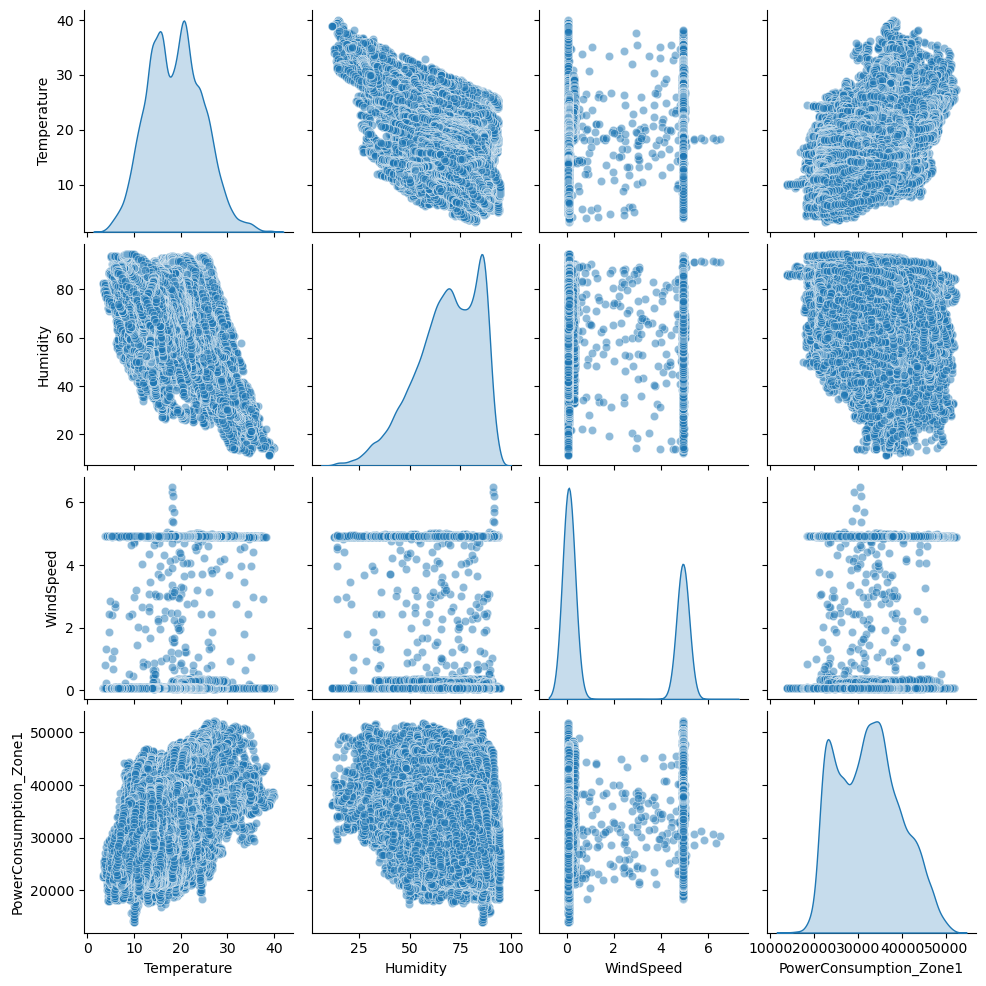

In [37]:
selected_columns = ['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1']
sns.pairplot(df[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# Вывод

В ходе анализа данных энергопотребления выявлены корреляции между погодными условиями и нагрузкой на сеть. Обнаружена сильная взаимосвязь между техническими параметрами распределительной сети. Потребление электроэнергии в разных зонах демонстрирует синхронную динамику. Статистический анализ подтвердил наличие аномальных значений в показателях диффузных потоков. Качество данных признано удовлетворительным для дальнейшего моделирования. Корреляционная матрица выявила как сильно связанные, так и независимые параметры. Полученные результаты позволяют переходить к этапу построения прогнозных моделей.